In [2]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
from tqdm import tqdm

In [3]:
url = 'http://dataset.website'
page = requests.get(url)

end = {
    "data":[]
}

soup = BeautifulSoup(page.text, 'html.parser')
table = soup.find('tbody')

for tr in tqdm(table.findAll("tr")):
    tr_prep = [tr.findAll("th")[0].text]
    for td in tr.findAll("td"):
        tr_prep.append(td.text)

    end["data"].append(tr_prep)
df = pd.DataFrame(end['data'])
df.columns = ['Customer_ID', 'Name', 'Age', 'Occupation', 'Num_of_Delayed_Payment', 'Annual_Income', 'Monthly_Inhand_Salary',
              'Num_Bank_Accounts', 'Num_Credit_Card', 'Num_of_Loan', 'Delay_from_due_date',	'Monthly_Balance', 'Outstanding_Debt',
              'Credit_Score']
df

100%|██████████████████████████████████| 10000/10000 [00:00<00:00, 18844.93it/s]


,Customer_ID,Name,Age,Occupation,Num_of_Delayed_Payment,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Num_of_Loan,Delay_from_due_date,Monthly_Balance,Outstanding_Debt,Credit_Score
0,CUS_0xd40,Aaron Maashoh,23,Scientist,7,19114.12,1824.8433333333,3,4,4,3,312.49408867943663,809.98,Good
1,CUS_0xd40,Aaron Maashoh,23,Scientist,8_,19114.12,1824.8433333333,3,4,4,3,244.5653167062043,809.98,Good
2,CUS_0x21b1,Rick Rothackerj,28_,_______,4,34847.84,3037.9866666667,2,4,1,3,470.69062692529184,605.03,Standard
3,CUS_0x21b1,Rick Rothackerj,28,Teacher,1,34847.84,3037.9866666667,2,4,1,7,484.5912142650067,605.03,Good
4,CUS_0x21b1,Rick Rothackerj,28,Teacher,-1,34847.84_,3037.9866666667,2,1385,1,3,466.46647639764313,605.03,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,CUS_0xa1bd,Ermanv,41,Journalist,10,23437.79,1711.1491666667,8,4,3,24,320.61940278914057,589.94,Standard
9996,CUS_0xa1bd,Ermanv,41,Journalist,12,23437.79,1711.1491666667,8,4,3,25,328.6262878504154,589.94,Poor
9997,CUS_0xa1bd,Ermanv,41,_______,12,23437.79,1711.1491666667,8,4,3,25,328.7174244853496,589.94,Poor
9998,CUS_0xa1bd,Ermanv,41,Journalist,14,23437.79,1711.1491666667,8,4,3,24,244.96479442371486,589.94,Poor


аномалии, дубликаты, изменение типов данных, пропуски

## Пропущенные значения

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Customer_ID             10000 non-null  object
 1   Name                    10000 non-null  object
 2   Age                     10000 non-null  object
 3   Occupation              10000 non-null  object
 4   Num_of_Delayed_Payment  10000 non-null  object
 5   Annual_Income           10000 non-null  object
 6   Monthly_Inhand_Salary   10000 non-null  object
 7   Num_Bank_Accounts       10000 non-null  object
 8   Num_Credit_Card         10000 non-null  object
 9   Num_of_Loan             10000 non-null  object
 10  Delay_from_due_date     10000 non-null  object
 11  Monthly_Balance         10000 non-null  object
 12  Outstanding_Debt        10000 non-null  object
 13  Credit_Score            10000 non-null  object
dtypes: object(14)
memory usage: 1.1+ MB


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Customer_ID             10000 non-null  object
 1   Name                    10000 non-null  object
 2   Age                     10000 non-null  object
 3   Occupation              10000 non-null  object
 4   Num_of_Delayed_Payment  10000 non-null  object
 5   Annual_Income           10000 non-null  object
 6   Monthly_Inhand_Salary   10000 non-null  object
 7   Num_Bank_Accounts       10000 non-null  object
 8   Num_Credit_Card         10000 non-null  object
 9   Num_of_Loan             10000 non-null  object
 10  Delay_from_due_date     10000 non-null  object
 11  Monthly_Balance         10000 non-null  object
 12  Outstanding_Debt        10000 non-null  object
 13  Credit_Score            10000 non-null  object
dtypes: object(14)
memory usage: 1.1+ MB


In [6]:
df['Age'].unique()

array(['23', '28_', '28', '34', '54', '55', '21', '31', '33', '30', '24',
       '24_', '44', '45', '40', '41', '32', '33_', '35', '35_', '36',
       '39', '37', '181', '30_', '20', '46', '26', '42', '48', '995',
       '38', '54_', '43', '21_', '22', '37_', '6409', '-500', '16', '19',
       '7080', '18', '3885', '20_', '15', '27', '43_', '3052', '14', '25',
       '17', '18_', '2111_', '46_', '47', '1032', '16_', '19_', '47_',
       '456', '5717', '53_', '53', '56', '25_', '38_', '27_', '55_',
       '31_', '3169', '29', '34_', '7140', '48_', '40_', '49', '8233',
       '6955', '3115', '7657', '51', '5112', '50_', '6452', '22_', '1439',
       '50', '5795', '4872', '1772', '15_', '1383', '5657', '52', '51_',
       '8352', '3734', '26_', '2056', '2339', '14_', '8406', '39_', '36_',
       '6953', '5626', '4471', '548', '44_', '5490', '525', '4202',
       '3665', '7670_', '3616', '6922', '42_', '6619', '1808', '7992',
       '45_', '223', '4659', '6895', '395', '3936', '3512', '123

очень много аномальных значений надо заменять путем группирования пользователей по id и поиска моды в каждой получившейся группе, далее заменить аномалии на моду

In [7]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Num_of_Delayed_Payment'] = pd.to_numeric(df['Num_of_Delayed_Payment'], errors='coerce')
df['Monthly_Inhand_Salary'] = pd.to_numeric(df['Monthly_Inhand_Salary'], errors='coerce')
df['Num_Bank_Accounts'] = pd.to_numeric(df['Num_Bank_Accounts'], errors='coerce')
df['Num_Credit_Card'] = pd.to_numeric(df['Num_Credit_Card'], errors='coerce')
df['Num_of_Loan'] = pd.to_numeric(df['Num_of_Loan'], errors='coerce')
df['Monthly_Balance'] = pd.to_numeric(df['Monthly_Balance'], errors='coerce')
df['Delay_from_due_date'] = pd.to_numeric(df['Delay_from_due_date'], errors='coerce')
df['Outstanding_Debt'] = pd.to_numeric(df['Outstanding_Debt'], errors='coerce')
df['Annual_Income'] = pd.to_numeric(df['Annual_Income'], errors='coerce')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer_ID             10000 non-null  object 
 1   Name                    10000 non-null  object 
 2   Age                     9489 non-null   float64
 3   Occupation              10000 non-null  object 
 4   Num_of_Delayed_Payment  9719 non-null   float64
 5   Annual_Income           9282 non-null   float64
 6   Monthly_Inhand_Salary   10000 non-null  float64
 7   Num_Bank_Accounts       10000 non-null  int64  
 8   Num_Credit_Card         10000 non-null  int64  
 9   Num_of_Loan             9526 non-null   float64
 10  Delay_from_due_date     10000 non-null  int64  
 11  Monthly_Balance         9999 non-null   float64
 12  Outstanding_Debt        9894 non-null   float64
 13  Credit_Score            10000 non-null  object 
dtypes: float64(7), int64(3), object(4)
memo

In [9]:
df.head(15)

,Customer_ID,Name,Age,Occupation,Num_of_Delayed_Payment,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Num_of_Loan,Delay_from_due_date,Monthly_Balance,Outstanding_Debt,Credit_Score
0,CUS_0xd40,Aaron Maashoh,23.0,Scientist,7.0,19114.12,1824.843333,3,4,4.0,3,312.494089,809.98,Good
1,CUS_0xd40,Aaron Maashoh,23.0,Scientist,NaN,19114.12,1824.843333,3,4,4.0,3,244.565317,809.98,Good
2,CUS_0x21b1,Rick Rothackerj,NaN,_______,4.0,34847.84,3037.986667,2,4,1.0,3,470.690627,605.03,Standard
3,CUS_0x21b1,Rick Rothackerj,28.0,Teacher,1.0,34847.84,3037.986667,2,4,1.0,7,484.591214,605.03,Good
4,CUS_0x21b1,Rick Rothackerj,28.0,Teacher,-1.0,NaN,3037.986667,2,1385,1.0,3,466.466476,605.03,Standard
5,CUS_0x21b1,Rick Rothackerj,28.0,Teacher,1.0,34847.84,3037.986667,2,4,1.0,3,444.867032,605.03,Good
6,CUS_0x21b1,Rick Rothackerj,28.0,Teacher,0.0,34847.84,3037.986667,2,4,1.0,3,481.505262,605.03,Good
7,CUS_0x21b1,Rick Rothackerj,28.0,Teacher,4.0,34847.84,3037.986667,2,4,1.0,3,356.078109,605.03,Good
8,CUS_0x2dbc,Langep,34.0,_______,8.0,143162.64,12187.220000,1,5,3.0,5,1043.315978,1303.01,Good
9,CUS_0x2dbc,Langep,34.0,Engineer,5.0,143162.64,12187.220000,1,5,3.0,8,426.513411,1303.01,Good


In [10]:
age_alience = df.groupby('Customer_ID')['Age']

In [11]:
df["Age"] = df['Age'].fillna(0)
df['Annual_Income'] = df['Annual_Income'].fillna(0)
df['Num_of_Loan'] = df['Num_of_Loan'].fillna(0)
df

,Customer_ID,Name,Age,Occupation,Num_of_Delayed_Payment,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Num_of_Loan,Delay_from_due_date,Monthly_Balance,Outstanding_Debt,Credit_Score
0,CUS_0xd40,Aaron Maashoh,23.0,Scientist,7.0,19114.12,1824.843333,3,4,4.0,3,312.494089,809.98,Good
1,CUS_0xd40,Aaron Maashoh,23.0,Scientist,NaN,19114.12,1824.843333,3,4,4.0,3,244.565317,809.98,Good
2,CUS_0x21b1,Rick Rothackerj,0.0,_______,4.0,34847.84,3037.986667,2,4,1.0,3,470.690627,605.03,Standard
3,CUS_0x21b1,Rick Rothackerj,28.0,Teacher,1.0,34847.84,3037.986667,2,4,1.0,7,484.591214,605.03,Good
4,CUS_0x21b1,Rick Rothackerj,28.0,Teacher,-1.0,0.00,3037.986667,2,1385,1.0,3,466.466476,605.03,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,CUS_0xa1bd,Ermanv,41.0,Journalist,10.0,23437.79,1711.149167,8,4,3.0,24,320.619403,589.94,Standard
9996,CUS_0xa1bd,Ermanv,41.0,Journalist,12.0,23437.79,1711.149167,8,4,3.0,25,328.626288,589.94,Poor
9997,CUS_0xa1bd,Ermanv,41.0,_______,12.0,23437.79,1711.149167,8,4,3.0,25,328.717424,589.94,Poor
9998,CUS_0xa1bd,Ermanv,41.0,Journalist,14.0,23437.79,1711.149167,8,4,3.0,24,244.964794,589.94,Poor


In [12]:
for col in age_alience:
    res = col[1].mode()[0]
    df.loc[df['Customer_ID'] == col[0], 'Age'] = res


In [13]:
occupation_group = df.groupby('Customer_ID')['Occupation']
def kill_occupation_nans(row):
    global df
    if row['Occupation'].strip().lower() == '_______':
        idx = row["Customer_ID"]
        d = list(filter(lambda x: x != '_______', df[df['Customer_ID'] == idx]['Occupation'].unique()))[0]
        row['Occupation'] = d
    return row
df = df.apply(kill_occupation_nans, axis=1)

In [14]:
Num_of_Delayed_Payment_group = df.groupby('Customer_ID')['Num_of_Delayed_Payment']
for group in Num_of_Delayed_Payment_group:
    res = group[1].mode()[0]
    df.loc[df['Customer_ID'] == group[0], 'Num_of_Delayed_Payment'] = res
df.head()

,Customer_ID,Name,Age,Occupation,Num_of_Delayed_Payment,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Num_of_Loan,Delay_from_due_date,Monthly_Balance,Outstanding_Debt,Credit_Score
0,CUS_0xd40,Aaron Maashoh,23.0,Scientist,7.0,19114.12,1824.843333,3,4,4.0,3,312.494089,809.98,Good
1,CUS_0xd40,Aaron Maashoh,23.0,Scientist,7.0,19114.12,1824.843333,3,4,4.0,3,244.565317,809.98,Good
2,CUS_0x21b1,Rick Rothackerj,28.0,Teacher,1.0,34847.84,3037.986667,2,4,1.0,3,470.690627,605.03,Standard
3,CUS_0x21b1,Rick Rothackerj,28.0,Teacher,1.0,34847.84,3037.986667,2,4,1.0,7,484.591214,605.03,Good
4,CUS_0x21b1,Rick Rothackerj,28.0,Teacher,1.0,0.00,3037.986667,2,1385,1.0,3,466.466476,605.03,Standard


In [15]:
Annual_Income_group = df.groupby('Customer_ID')['Annual_Income']
for group in Annual_Income_group:
    res = group[1].mode()[0]
    df.loc[df['Customer_ID'] == group[0], 'Annual_Income'] = res

In [16]:
sorted(df['Monthly_Inhand_Salary'].unique()) 

[355.2083333333,
 380.6491666667,
 393.69875,
 412.1120833333,
 424.3041666667,
 425.5501786281,
 440.0408798729,
 458.67125,
 468.77,
 502.3679166667,
 507.5954166667,
 513.01875,
 514.2741666667,
 519.12875,
 521.3745833333,
 524.9454166667,
 524.9945833333,
 526.8958333333,
 533.60875,
 536.43125,
 555.2058333333,
 557.9641666667,
 558.8295833333,
 567.7979166667,
 573.3729166667,
 576.8079166667,
 577.3591666667,
 592.1791666667,
 593.8883333333,
 601.4445833333,
 609.1708333333,
 614.2879166667,
 618.93875,
 625.46875,
 626.82625,
 636.025,
 647.015,
 647.4808333333,
 652.49625,
 656.6545833333,
 657.7675,
 666.4933333333,
 671.19,
 678.1120833333,
 683.2533333333,
 690.1116666667,
 692.8145833333,
 694.0841666667,
 695.2595833333,
 696.8766666667,
 697.12875,
 706.1195833333,
 710.36375,
 712.2970833333,
 719.2125,
 725.9195833333,
 729.3333333333,
 730.8220833333,
 739.5354166667,
 743.1683333333,
 750.5645833333,
 751.2870833333,
 753.18125,
 757.9845833333,
 758.9454166667,
 7

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer_ID             10000 non-null  object 
 1   Name                    10000 non-null  object 
 2   Age                     10000 non-null  float64
 3   Occupation              10000 non-null  object 
 4   Num_of_Delayed_Payment  10000 non-null  float64
 5   Annual_Income           10000 non-null  float64
 6   Monthly_Inhand_Salary   10000 non-null  float64
 7   Num_Bank_Accounts       10000 non-null  int64  
 8   Num_Credit_Card         10000 non-null  int64  
 9   Num_of_Loan             10000 non-null  float64
 10  Delay_from_due_date     10000 non-null  int64  
 11  Monthly_Balance         9999 non-null   float64
 12  Outstanding_Debt        9894 non-null   float64
 13  Credit_Score            10000 non-null  object 
dtypes: float64(7), int64(3), object(4)
memo

In [18]:
Num_Bank_Accounts_group = df.groupby('Customer_ID')['Num_Bank_Accounts']
for group in Num_Bank_Accounts_group:
    res = group[1].mode()[0]
    df.loc[df['Customer_ID'] == group[0], 'Num_Bank_Accounts'] = res

In [19]:
Num_Credit_Card_group = df.groupby('Customer_ID')['Num_Credit_Card']
for group in Num_Credit_Card_group:
    res = group[1].mode()[0]
    df.loc[df['Customer_ID'] == group[0], 'Num_Credit_Card'] = res

In [20]:
df['Num_of_Loan'] = df['Num_of_Loan'].astype('int64')
Num_of_Loan_group = df.groupby('Customer_ID')['Num_of_Loan']
for group in Num_of_Loan_group:
    res = group[1].mode()[0]
    df.loc[df['Customer_ID'] == group[0], 'Num_of_Loan'] = res

In [21]:
Monthly_Balance_mean = df.loc[df['Customer_ID'] == 'CUS_0x9885', 'Monthly_Balance'].mean()
df['Monthly_Balance'] = df['Monthly_Balance'].fillna(Monthly_Balance_mean)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer_ID             10000 non-null  object 
 1   Name                    10000 non-null  object 
 2   Age                     10000 non-null  float64
 3   Occupation              10000 non-null  object 
 4   Num_of_Delayed_Payment  10000 non-null  float64
 5   Annual_Income           10000 non-null  float64
 6   Monthly_Inhand_Salary   10000 non-null  float64
 7   Num_Bank_Accounts       10000 non-null  int64  
 8   Num_Credit_Card         10000 non-null  int64  
 9   Num_of_Loan             10000 non-null  int64  
 10  Delay_from_due_date     10000 non-null  int64  
 11  Monthly_Balance         10000 non-null  float64
 12  Outstanding_Debt        9894 non-null   float64
 13  Credit_Score            10000 non-null  object 
dtypes: float64(6), int64(4), object(4)
memo

In [23]:
Outstanding_Debt_group = df.groupby('Customer_ID')['Outstanding_Debt']
for group in Outstanding_Debt_group:
    res = group[1].mode()[0]
    df.loc[df['Customer_ID'] == group[0], 'Outstanding_Debt'] = res

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer_ID             10000 non-null  object 
 1   Name                    10000 non-null  object 
 2   Age                     10000 non-null  float64
 3   Occupation              10000 non-null  object 
 4   Num_of_Delayed_Payment  10000 non-null  float64
 5   Annual_Income           10000 non-null  float64
 6   Monthly_Inhand_Salary   10000 non-null  float64
 7   Num_Bank_Accounts       10000 non-null  int64  
 8   Num_Credit_Card         10000 non-null  int64  
 9   Num_of_Loan             10000 non-null  int64  
 10  Delay_from_due_date     10000 non-null  int64  
 11  Monthly_Balance         10000 non-null  float64
 12  Outstanding_Debt        10000 non-null  float64
 13  Credit_Score            10000 non-null  object 
dtypes: float64(6), int64(4), object(4)
memo

In [25]:
df.head(50)

,Customer_ID,Name,Age,Occupation,Num_of_Delayed_Payment,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Num_of_Loan,Delay_from_due_date,Monthly_Balance,Outstanding_Debt,Credit_Score
0,CUS_0xd40,Aaron Maashoh,23.0,Scientist,7.0,19114.12,1824.843333,3,4,4,3,312.494089,809.98,Good
1,CUS_0xd40,Aaron Maashoh,23.0,Scientist,7.0,19114.12,1824.843333,3,4,4,3,244.565317,809.98,Good
2,CUS_0x21b1,Rick Rothackerj,28.0,Teacher,1.0,34847.84,3037.986667,2,4,1,3,470.690627,605.03,Standard
3,CUS_0x21b1,Rick Rothackerj,28.0,Teacher,1.0,34847.84,3037.986667,2,4,1,7,484.591214,605.03,Good
4,CUS_0x21b1,Rick Rothackerj,28.0,Teacher,1.0,34847.84,3037.986667,2,4,1,3,466.466476,605.03,Standard
5,CUS_0x21b1,Rick Rothackerj,28.0,Teacher,1.0,34847.84,3037.986667,2,4,1,3,444.867032,605.03,Good
6,CUS_0x21b1,Rick Rothackerj,28.0,Teacher,1.0,34847.84,3037.986667,2,4,1,3,481.505262,605.03,Good
7,CUS_0x21b1,Rick Rothackerj,28.0,Teacher,1.0,34847.84,3037.986667,2,4,1,3,356.078109,605.03,Good
8,CUS_0x2dbc,Langep,34.0,Engineer,5.0,143162.64,12187.220000,1,5,3,5,1043.315978,1303.01,Good
9,CUS_0x2dbc,Langep,34.0,Engineer,5.0,143162.64,12187.220000,1,5,3,8,426.513411,1303.01,Good


<AxesSubplot:>

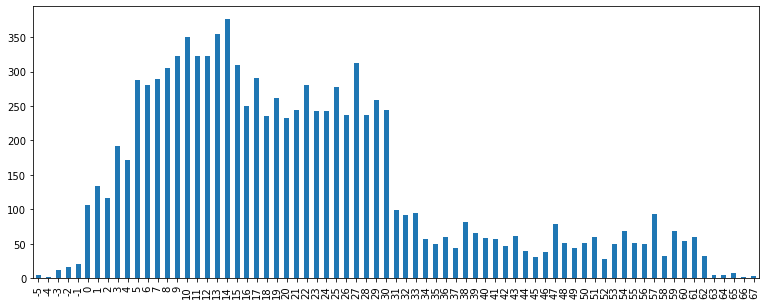

In [26]:
df['Delay_from_due_date'].value_counts().sort_index().plot.bar(figsize=(13, 5))

<AxesSubplot:>

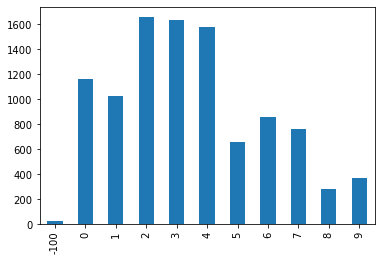

In [27]:
df['Num_of_Loan'].value_counts().sort_index().plot.bar()

In [28]:
df.loc[df['Delay_from_due_date'] < 0] = 0

In [29]:
df = df.loc[(0 <= df['Num_of_Loan']) & (df['Num_of_Loan'] <= 9)]

<AxesSubplot:>

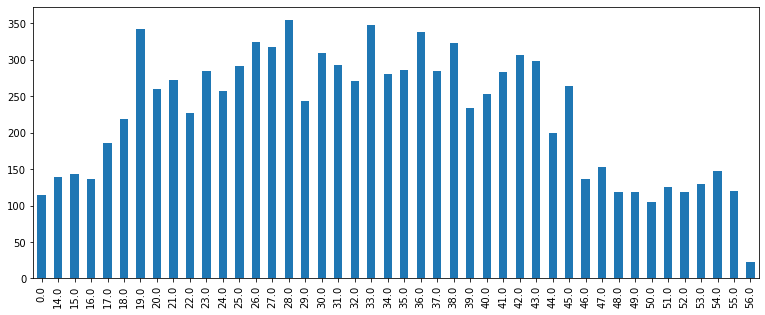

In [30]:
df['Age'].value_counts().sort_index().plot.bar(figsize=(13, 5))

In [31]:
df = df.loc[df['Age'] != 0]

In [32]:
df.loc[df['Age'] > 56] = df["Age"].median()

In [33]:
df

,Customer_ID,Name,Age,Occupation,Num_of_Delayed_Payment,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Num_of_Loan,Delay_from_due_date,Monthly_Balance,Outstanding_Debt,Credit_Score
0,CUS_0xd40,Aaron Maashoh,23.0,Scientist,7.0,19114.12,1824.843333,3,4,4,3,312.494089,809.98,Good
1,CUS_0xd40,Aaron Maashoh,23.0,Scientist,7.0,19114.12,1824.843333,3,4,4,3,244.565317,809.98,Good
2,CUS_0x21b1,Rick Rothackerj,28.0,Teacher,1.0,34847.84,3037.986667,2,4,1,3,470.690627,605.03,Standard
3,CUS_0x21b1,Rick Rothackerj,28.0,Teacher,1.0,34847.84,3037.986667,2,4,1,7,484.591214,605.03,Good
4,CUS_0x21b1,Rick Rothackerj,28.0,Teacher,1.0,34847.84,3037.986667,2,4,1,3,466.466476,605.03,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,CUS_0xa1bd,Ermanv,41.0,Journalist,12.0,23437.79,1711.149167,8,4,3,24,320.619403,589.94,Standard
9996,CUS_0xa1bd,Ermanv,41.0,Journalist,12.0,23437.79,1711.149167,8,4,3,25,328.626288,589.94,Poor
9997,CUS_0xa1bd,Ermanv,41.0,Journalist,12.0,23437.79,1711.149167,8,4,3,25,328.717424,589.94,Poor
9998,CUS_0xa1bd,Ermanv,41.0,Journalist,12.0,23437.79,1711.149167,8,4,3,24,244.964794,589.94,Poor


__EDA и часть визуализации__

In [3]:
#pip3 install pandas-profiling==2.11

In [4]:
import pandas as pd
import seaborn as sns
from pandas_profiling import ProfileReport
from wordcloud import WordCloud, STOPWORDS

sns.set_style("darkgrid")

In [5]:
profile = ProfileReport(df)
profile.to_notebook_iframe()

NameError: name 'df' is not defined

В данном окне с внушительным анализом по всем показателям можем посмотувидеть различные закономерности и ососбенности переменных.

- Так, по анализу переменной __Age__ можем отметить, что клиенты банка в основном люди в возрасте от 20 до 45 лет, при этом средний возраст раемщика __33 года__, минимальный же возраст __14 лет__, максимальный - __56 лет__.


- Больше всего среди всего числа заемщиков представителей профессии __журналист, переводчик и адвокат__.


- __Количество просроченных платежей в среднем составляет 13__, при этом мы видим, что есть и такие клиенты, у которых отстутствуют просроченные платежи. Ниже можно увидеть, что в основном отсутствуют просрочки и людей с Credit Score равным Good и Standard, однако есть и представители плохой кредитоспособности - значит, можно предположить, что __данный показатель не настолько сильно, но все же влияет на оценку кредитоспособности заемщика__.


- Средний годовой доход равен __51032.4 долларов__, средний месячный доход - __4289.5__.


- Среднее количество кредитных карт - __5.5__, и мы наблюдаем всего 6 клиентов, у которых отсутсвуют карты, это значит, что __большинство клиентов являются заемщиками именно по кредитным картам__.


- А вот __среднее количество кредитов меньше, чем среднее количество кредитных карт, всего 3.5__, и нулей гораздо больше, что подтверждает утверждение о том, что большинство клиентов являются заемщиками именно по кредитным картам.


- __Задержки от даты платежа наблюдаются часто__, в среднем составляют 21 день, однако по гистограмме видим, что примерно равномерно распределены от 5 до 32-32 дней, за исключением определенных выделяющихся значений.

- __Ежемесячный баланс__ распределен почти нормально (немного смещен влево и правый хвост больше). Среднее значение - __407 долларов__. 

- Оставшаяся задолженность клиентов в среднем __1405 долларов__, что достаточно небольшая сумма для кредитов, но вполне реальная для кредитных карт. 

- И самый интересный показатель - кредитный рейтинг клиента. Заметим, что чаще у банка заемщики __со стандартным кредитным рейтингом - 5212, с плохим - 2927, а вот с хорошим всего 1724 человека__. 


Числовые показатели довольно сильно розняться взависимости от категории кредитоспособности заемщика, поэтому разделим всех клиентов банка на три группы по кредитному рейтингу и проанализируем данные показатели по ним.

In [42]:
df[df['Num_of_Delayed_Payment'] == 0]['Credit_Score'].value_counts()

Good        101
Standard     99
Poor         43
Name: Credit_Score, dtype: int64

In [43]:
df[df['Num_Bank_Accounts'] == 0]['Credit_Score'].value_counts()

Standard    200
Good        166
Poor        120
Name: Credit_Score, dtype: int64

(-0.5, 2999.5, 1999.5, -0.5)

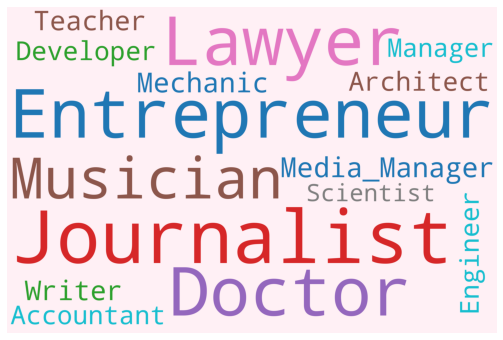

In [36]:
text = ' sep '.join(df.sort_values('Occupation')['Occupation'].to_list()) 

wordcloud = WordCloud(width = 3000, 
                      height = 2000, 
                      random_state=1, 
                      background_color='LavenderBlush', 
                      margin=20, 
                      colormap='tab10',
                      collocations=True,
                      stopwords = ['sep']).generate(text)

plt.figure(figsize=(13, 6))
plt.imshow(wordcloud) 
plt.axis("off")

<AxesSubplot:>

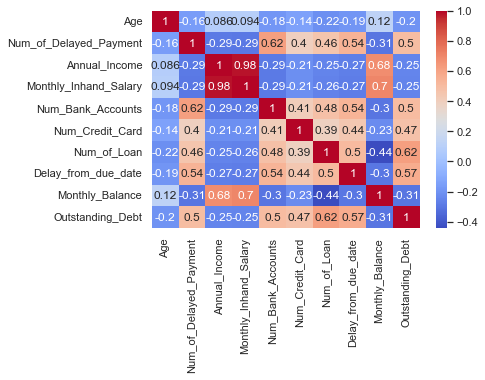

In [37]:
corr_matrix = df.corr()

sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

Видим, что наиболее сильная корреляция у таких пар, как :

- ежемесячный и годовой доход клиента (что вполне логично и может не рассматриваться, как важная зависимость)

- количество банковских счетов и количество просроченных платежей 

- Ежемесячный чистый доход и Месячный баланс

- Оставшаяся задолженность и Количество займов, Задержка относительно срока платежа


Посмотрим от каких переменных в наибольшей степени зависит кретинтый рейтинг клиента

In [107]:
credit_score_dict = {'Poor': 0, 'Standard': 1, 'Good': 2}

df['Credit_Score_Num'] = df['Credit_Score'].replace(credit_score_dict)

correlations = df.corr()['Credit_Score_Num'].sort_values(ascending=False)
print('\nMost Positive Correlations:\n','\n', correlations.head(5), '\n')
print('Most Negative Correlations:\n','\n', correlations.tail(5))


Most Positive Correlations:
 
 Credit_Score_Num         1.000000
Monthly_Balance          0.223130
Monthly_Inhand_Salary    0.217677
Annual_Income            0.217396
Age                      0.162957
Name: Credit_Score_Num, dtype: float64 

Most Negative Correlations:
 
 Num_Bank_Accounts     -0.356801
Num_of_Loan           -0.362114
Outstanding_Debt      -0.373486
Num_Credit_Card       -0.388982
Delay_from_due_date   -0.415741
Name: Credit_Score_Num, dtype: float64


Создадим три таблицы с представителями каждой категорией рейтинга клиента.

In [103]:
credit_score_categories = ['Good', 'Poor', 'Standard']

tables = {}

for category in credit_score_categories:

    table = pd.DataFrame({
        'Metric': ['Mode', 'Median', 'Mean'],
        'Age': [df[df['Credit_Score'] == category]['Age'].mode().values[0],
                df[df['Credit_Score'] == category]['Age'].median(),
                df[df['Credit_Score'] == category]['Age'].mean()],
        'Num_of_Delayed_Payment': [df[df['Credit_Score'] == category]['Num_of_Delayed_Payment'].mode().values[0],
                                   df[df['Credit_Score'] == category]['Num_of_Delayed_Payment'].median(),
                                   df[df['Credit_Score'] == category]['Num_of_Delayed_Payment'].mean()],
        'Annual_Income': [df[df['Credit_Score'] == category]['Annual_Income'].mode().values[0],
                          df[df['Credit_Score'] == category]['Annual_Income'].median(),
                          df[df['Credit_Score'] == category]['Annual_Income'].mean()],
        'Monthly_Inhand_Salary': [df[df['Credit_Score'] == category]['Monthly_Inhand_Salary'].mode().values[0],
                                  df[df['Credit_Score'] == category]['Monthly_Inhand_Salary'].median(),
                                  df[df['Credit_Score'] == category]['Monthly_Inhand_Salary'].mean()],
        'Num_Bank_Accounts': [df[df['Credit_Score'] == category]['Num_Bank_Accounts'].mode().values[0],
                              df[df['Credit_Score'] == category]['Num_Bank_Accounts'].median(),
                              df[df['Credit_Score'] == category]['Num_Bank_Accounts'].mean()],
        'Num_Credit_Card': [df[df['Credit_Score'] == category]['Num_Credit_Card'].mode().values[0],
                            df[df['Credit_Score'] == category]['Num_Credit_Card'].median(),
                            df[df['Credit_Score'] == category]['Num_Credit_Card'].mean()],
        'Num_of_Loan': [df[df['Credit_Score'] == category]['Num_of_Loan'].mode().values[0],
                        df[df['Credit_Score'] == category]['Num_of_Loan'].median(),
                        df[df['Credit_Score'] == category]['Num_of_Loan'].mean()],
        'Delay_from_due_date': [df[df['Credit_Score'] == category]['Delay_from_due_date'].mode().values[0],
                                df[df['Credit_Score'] == category]['Delay_from_due_date'].median(),
                                df[df['Credit_Score'] == category]['Delay_from_due_date'].mean()],
        'Monthly_Balance': [df[df['Credit_Score'] == category]['Monthly_Balance'].mode().values[0],
                            df[df['Credit_Score'] == category]['Monthly_Balance'].median(),
                            df[df['Credit_Score'] == category]['Monthly_Balance'].mean()],
        'Outstanding_Debt': [df[df['Credit_Score'] == category]['Outstanding_Debt'].mode().values[0],
                             df[df['Credit_Score'] == category]['Outstanding_Debt'].median(),
                             df[df['Credit_Score'] == category]['Outstanding_Debt'].mean()]})
    tables[category] = table

table_poor = tables['Poor']
table_standard = tables['Standard']
table_good = tables['Good']

In [102]:
table_poor

,Metric,Age,Num_of_Delayed_Payment,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Num_of_Loan,Delay_from_due_date,Monthly_Balance,Outstanding_Debt
0,Mode,28.000000,19.000000,0.000000,656.654583,6.000000,5.000000,6.000000,25.000000,1.227628,2695.380000
1,Median,30.000000,16.000000,34107.420000,2902.990833,7.000000,6.000000,5.000000,26.000000,306.422370,1843.930000
2,Mean,31.034165,15.197472,41953.411594,3529.789908,6.330031,6.499146,4.687735,29.014349,349.396031,2012.966467


In [104]:
table_standard

,Metric,Age,Num_of_Delayed_Payment,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Num_of_Loan,Delay_from_due_date,Monthly_Balance,Outstanding_Debt
0,Mode,38.000000,17.000000,0.000000,896.089583,6.000000,5.000000,3.000000,10.000000,4.469998,89.620000
1,Median,33.000000,14.000000,38073.600000,3282.269196,6.000000,5.000000,3.000000,18.000000,344.876175,1013.570000
2,Mean,32.994436,13.362817,50611.427182,4261.364155,5.336723,5.362049,3.298542,20.113392,409.091510,1277.661782


In [105]:
table_good

,Metric,Age,Num_of_Delayed_Payment,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Num_of_Loan,Delay_from_due_date,Monthly_Balance,Outstanding_Debt
0,Mode,36.000000,8.000000,0.000000,1365.072083,3.000000,4.000000,2.00000,14.000000,0.908146,466.130000
1,Median,36.000000,8.000000,60781.480000,5082.143333,3.000000,4.000000,2.00000,10.000000,418.101726,670.050000
2,Mean,36.335847,8.216357,67719.599887,5664.242492,3.441415,4.171694,2.13051,11.182715,497.194863,757.737668


__Вывод какой-то:__

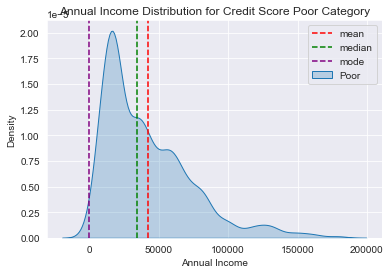

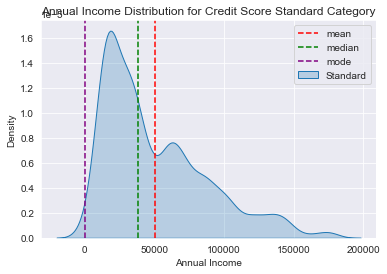

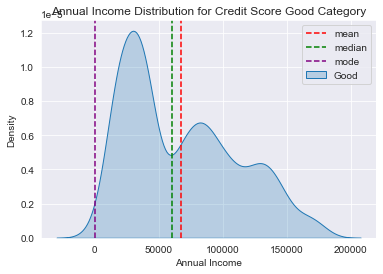

In [46]:
credit_score_categories = ['Poor', 'Standard', 'Good']

for category in credit_score_categories:
    filtered_df = df[df['Credit_Score'] == category]
    
    sns.kdeplot(filtered_df['Annual_Income'], label=category, shade=True)
    
    plt.axvline(x=filtered_df['Annual_Income'].mean(), linestyle='--', color='red', label='mean')
    plt.axvline(x=filtered_df['Annual_Income'].median(), linestyle='--', color='green', label='median')
    plt.axvline(x=filtered_df['Annual_Income'].mode()[0], linestyle='--', color='purple', label='mode')
    
    plt.title(f'Annual Income Distribution for Credit Score {category} Category')
    plt.xlabel('Annual Income')
    plt.ylabel('Density')
    plt.legend()

    plt.show()

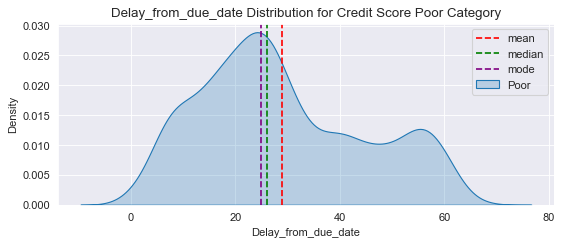

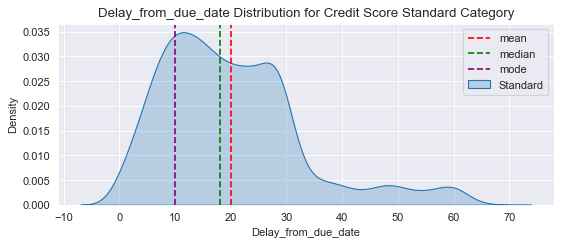

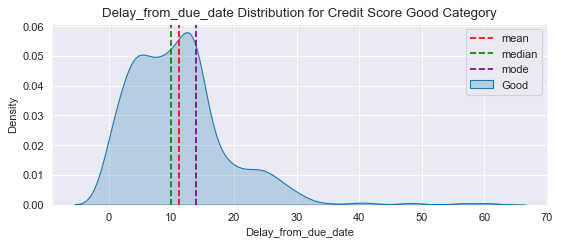

In [49]:
for category in credit_score_categories:
    filtered_df = df[df['Credit_Score'] == category]
    
    plt.figure(figsize=(8, 3), dpi=80)
    sns.kdeplot(filtered_df['Delay_from_due_date'], label=category, shade=True)
    
    plt.axvline(x=filtered_df['Delay_from_due_date'].mean(), linestyle='--', color='red', label='mean')
    plt.axvline(x=filtered_df['Delay_from_due_date'].median(), linestyle='--', color='green', label='median')
    plt.axvline(x=filtered_df['Delay_from_due_date'].mode()[0], linestyle='--', color='purple', label='mode')
    
    plt.title(f'Delay_from_due_date Distribution for Credit Score {category} Category')
    plt.xlabel('Delay_from_due_date')
    plt.ylabel('Density')
    plt.legend()
    
    plt.show()

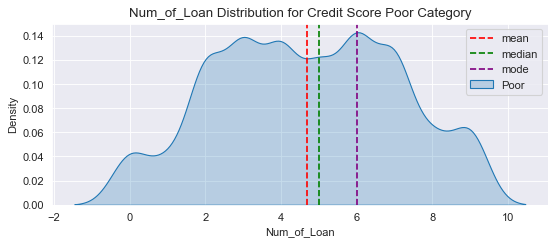

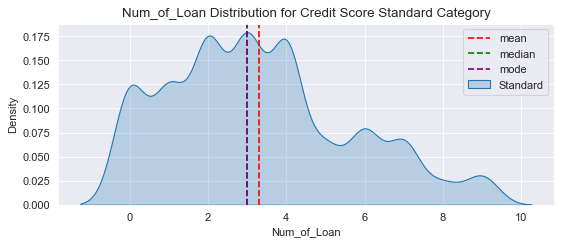

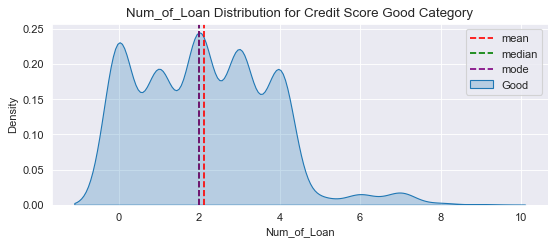

In [50]:
for category in credit_score_categories:
    filtered_df = df[df['Credit_Score'] == category]
    
    plt.figure(figsize=(8, 3), dpi=80)
    sns.kdeplot(filtered_df['Num_of_Loan'], label=category, shade=True)
    
    plt.axvline(x=filtered_df['Num_of_Loan'].mean(), linestyle='--', color='red', label='mean')
    plt.axvline(x=filtered_df['Num_of_Loan'].median(), linestyle='--', color='green', label='median')
    plt.axvline(x=filtered_df['Num_of_Loan'].mode()[0], linestyle='--', color='purple', label='mode')
    
    plt.title(f'Num_of_Loan Distribution for Credit Score {category} Category')
    plt.xlabel('Num_of_Loan')
    plt.ylabel('Density')
    plt.legend()
    
    plt.show()

In [51]:
df['Debt_Ratio'] = df['Outstanding_Debt'] / df['Monthly_Inhand_Salary']

df['Savings_Ratio'] = df['Monthly_Balance'] / df['Monthly_Inhand_Salary']

df['Credit_Utilization_Ratio'] = df['Num_of_Loan'] / df['Num_Credit_Card']

df['Payment_to_Income_Ratio'] = df['Delay_from_due_date'] / df['Monthly_Inhand_Salary']

In [52]:
df

,Customer_ID,Name,Age,Occupation,Num_of_Delayed_Payment,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Num_of_Loan,Delay_from_due_date,Monthly_Balance,Outstanding_Debt,Credit_Score,Debt_Ratio,Savings_Ratio,Credit_Utilization_Ratio,Payment_to_Income_Ratio
0,CUS_0xd40,Aaron Maashoh,23.0,Scientist,7.0,19114.12,1824.843333,3,4,4,3,312.494089,809.98,Good,0.443863,0.171244,1.00,0.001644
1,CUS_0xd40,Aaron Maashoh,23.0,Scientist,7.0,19114.12,1824.843333,3,4,4,3,244.565317,809.98,Good,0.443863,0.134020,1.00,0.001644
2,CUS_0x21b1,Rick Rothackerj,28.0,Teacher,1.0,34847.84,3037.986667,2,4,1,3,470.690627,605.03,Standard,0.199155,0.154935,0.25,0.000987
3,CUS_0x21b1,Rick Rothackerj,28.0,Teacher,1.0,34847.84,3037.986667,2,4,1,7,484.591214,605.03,Good,0.199155,0.159511,0.25,0.002304
4,CUS_0x21b1,Rick Rothackerj,28.0,Teacher,1.0,34847.84,3037.986667,2,4,1,3,466.466476,605.03,Standard,0.199155,0.153545,0.25,0.000987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,CUS_0xa1bd,Ermanv,41.0,Journalist,12.0,23437.79,1711.149167,8,4,3,24,320.619403,589.94,Standard,0.344762,0.187371,0.75,0.014026
9996,CUS_0xa1bd,Ermanv,41.0,Journalist,12.0,23437.79,1711.149167,8,4,3,25,328.626288,589.94,Poor,0.344762,0.192050,0.75,0.014610
9997,CUS_0xa1bd,Ermanv,41.0,Journalist,12.0,23437.79,1711.149167,8,4,3,25,328.717424,589.94,Poor,0.344762,0.192103,0.75,0.014610
9998,CUS_0xa1bd,Ermanv,41.0,Journalist,12.0,23437.79,1711.149167,8,4,3,24,244.964794,589.94,Poor,0.344762,0.143158,0.75,0.014026


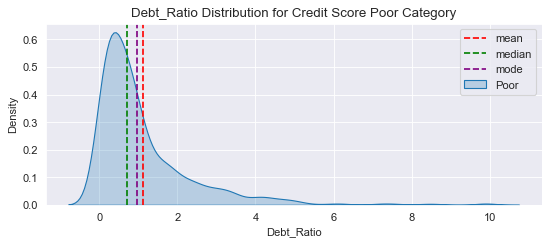

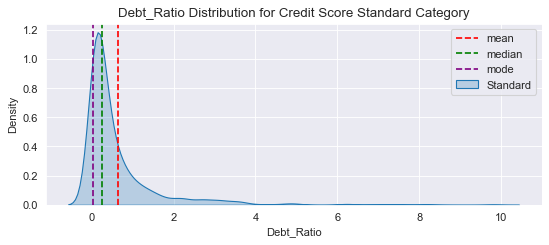

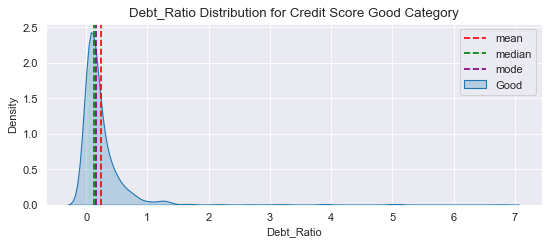

In [53]:
for category in credit_score_categories:
    filtered_df = df[df['Credit_Score'] == category]

    plt.figure(figsize=(8, 3), dpi=80)
    sns.kdeplot(filtered_df['Debt_Ratio'], label=category, shade=True)
    
    plt.axvline(x=filtered_df['Debt_Ratio'].mean(), linestyle='--', color='red', label='mean')
    plt.axvline(x=filtered_df['Debt_Ratio'].median(), linestyle='--', color='green', label='median')
    plt.axvline(x=filtered_df['Debt_Ratio'].mode()[0], linestyle='--', color='purple', label='mode')
    
    plt.title(f'Debt_Ratio Distribution for Credit Score {category} Category')
    plt.xlabel('Debt_Ratio')
    plt.ylabel('Density')
    plt.legend()
    
    plt.show()

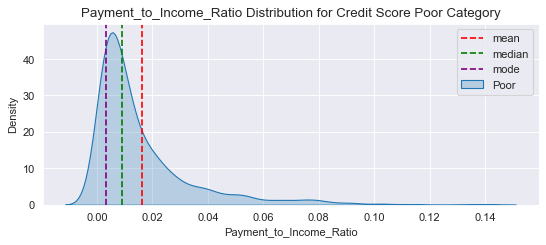

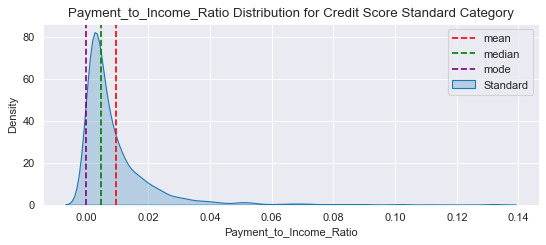

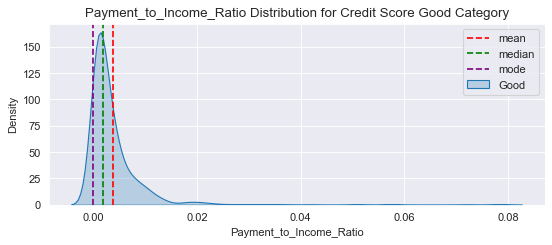

In [54]:

for category in credit_score_categories:
    filtered_df = df[df['Credit_Score'] == category]
    
    plt.figure(figsize=(8, 3), dpi=80)
    sns.kdeplot(filtered_df['Payment_to_Income_Ratio'], label=category, shade=True)
    
    plt.axvline(x=filtered_df['Payment_to_Income_Ratio'].mean(), linestyle='--', color='red', label='mean')
    plt.axvline(x=filtered_df['Payment_to_Income_Ratio'].median(), linestyle='--', color='green', label='median')
    plt.axvline(x=filtered_df['Payment_to_Income_Ratio'].mode()[0], linestyle='--', color='purple', label='mode')
    
    plt.title(f'Payment_to_Income_Ratio Distribution for Credit Score {category} Category')
    plt.xlabel('Payment_to_Income_Ratio')
    plt.ylabel('Density')
    plt.legend()
    
    plt.show()

## Гипотезы

1. Доход "хороших" заемщиков больше, чем у "плохих".
2. Количество кредитов "хороших" заемщиков меньше, чем у плохих.
3. Людей с плохим кредитным рейтингом значительно больше, чем с хорошим.
4. При низких доходах увеличивается шанс не возврата кредита.
5. Увеличение количества банковских счетов увеличивает количество просроченных платежей.